<a href="https://colab.research.google.com/github/qyune/Random-Forest-For-Imbalanced-Dataset/blob/main/RFs_Imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

**The following command install the imbalanced-learn the latest version**

In [8]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


**Make sure you are using imblearn v0.7.0**



In [9]:
import imblearn
print(imblearn.__version__)

0.7.0


**2. Data preprocessing** 
We directly load the dataset and transform categorical values to numerical values. We decided
to make the dataset more imbalanced for the sake of showing different methods
to handle extremely imbalanced datasets with Random Forest.

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/aug_train.csv')
# clean up dataset
cleanup = {'Gender': {'Male': 1, 'Female': 0},
       'Vehicle_Damage': {'Yes': 1, 'No': 0},
       'Vehicle_Age':{'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}}
df = df.replace(cleanup)
df = df.drop('id', axis=1)
print(df['Response'].value_counts())
# form groups by 'Response' class
grouped = df.groupby('Response')
# spilt data by 'Response' label
min_df = grouped.get_group(1)
maj_df = grouped.get_group(0)
# randomly select of 'Response' class
maj_df = maj_df.sample(frac=.2, random_state=2)
min_df = min_df.sample(frac=.1, random_state=2)
# combine two dataframe
frames = [maj_df, min_df]
df = pd.concat(frames)
# randomize the order
df = df.sample(frac=1).reset_index(drop=True)
print(df.head(5))
print(df['Response'].value_counts())
#spilt data to numpy arrays
X = df.iloc[:, 0:10].values
y = df.iloc[:, 10].values

0    319553
1     62601
Name: Response, dtype: int64
   Gender  Age  Driving_License  ...  Policy_Sales_Channel  Vintage  Response
0       1   21                1  ...                 160.0       98         0
1       1   26                1  ...                 152.0      121         0
2       1   47                1  ...                  26.0      194         0
3       0   25                1  ...                 152.0      193         0
4       0   28                1  ...                 152.0      213         0

[5 rows x 11 columns]
0    63911
1     6260
Name: Response, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
print('train X', X_train.shape)
print('train y', y_train.shape)
print('test X', X_test.shape)
print('test y', y_test.shape)

train X (63153, 10)
train y (63153,)
test X (7018, 10)
test y (7018,)


In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# over sampling with smote
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)
print('SMOTE train X', over_X_train.shape)
print('SMOTE train y', over_y_train.shape)
print('SMOTE test X', over_X_test.shape)
print('SMOTE test y', over_y_test.shape)

SMOTE train X (115039, 10)
SMOTE train y (115039,)
SMOTE test X (12783, 10)
SMOTE test y (12783,)


# Standard Random Forest

Mean f1: 0.156
Mean recall: 0.100
Mean precision: 0.359


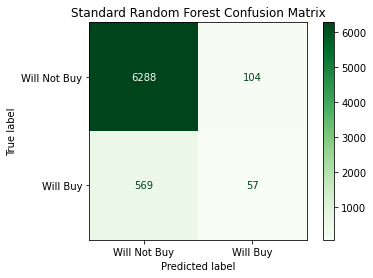

In [13]:
#Importing essential libraries
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#Build SRF model
SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRF, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train SRF
SRF.fit(X_train, y_train)
#SRF prediction result
y_pred = SRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(SRF, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')
plt.show()

## Balanced Random Forest (BRF)

Mean f1: 0.406
Mean recall: 0.915
Mean precision: 0.261


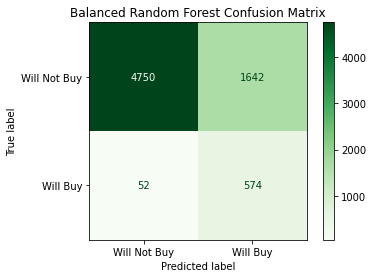

In [14]:
#Importing essential libraries
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier

#Build BRF model
BRF = BalancedRandomForestClassifier(n_estimators=150, random_state=2)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate BRF model
scores = cross_validate(BRF, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train BRF
BRF.fit(X_train, y_train)
#BRF prediction result
y_pred = BRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(BRF, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Greens')
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()

## SMOTE

Mean f1: 0.939
Mean recall: 0.939
Mean precision: 0.938


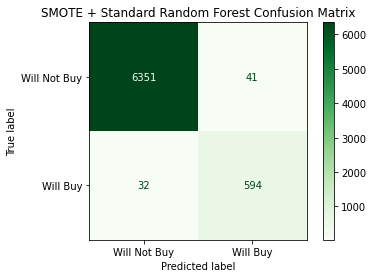

In [15]:
#Importing essential libraries
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()